# Projeto
## Integrantes do Grupo:
  - Lucas Henrique Antoneli Flaquer - 180952
  - Jean Augusto Bauch - 180375
  - Vinícius Espinosa de Oliveira - 180853
  - Samel Ferraz de Araujo - 180207

# Sobre a Base de Dados

Link da base: https://archive.ics.uci.edu/ml/datasets/Adult
OBS: A base original possui apenas as linhas, sem o cabeçalho. Tivemos que colocar na mão para

# Base Escolhida: Adult Data Set
Uma base de dados que visa prever se a renda excede de 50k/ano dos cidadãos norte americanos de acordo com alguns parâmetros.

## Atributos (Português)
Idade, Classe operária, Peso, Escolaridade, Anos de escolaridade, Estado civil, Ocupação, Relação, Raça, Sexo, Ganho de capital, Perda de capital, Horas por semana, País de origem e a coluna se é ou não mais que 50k por ano.

## Atributos e opções

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
isGreater50k: >50K, <=50K.

## Breve explicação de alguns atributos

Age Work-class Final-weight Education Education-num (Number of years of education) Marital-status Occupation Relationship Race Sex Capital-gain Capital-loss Hours-per-week Native-country The dependent variable is the “income-level” that represents the level of income. This is a categorical variable and thus it can only take two values:
Final weight é o peso


# Configurando a base

• Importar biblioteca para leitura da base

• Ler e armazenar a base de dados em uma variável

In [2]:
# Importar biblioteca pandas para leitura da base
import pandas as pd

# Ler base de dados e atribuir interrogação para os valores nulos
df = pd.read_csv('adult.data')

# Mostra os 5 primeiros dados da base
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Analise dos dados

Primeiro foi feito a limpeza dos dados nulos. Como a quantidade de dados inválidos encontrados não eram expressivos, foi optado por remover todas as linhas que possuissem dados inválidos

In [3]:
# Somando os valores nulos
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
ocupation         0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
greater           1
dtype: int64

In [4]:
# Mostrando a forma (Linhas x Colunas) da base de dados
print(df.shape)

(25565, 15)


In [5]:
# Eliminando as linhas com dados nulos
df = df.dropna()

# Mostrando a forma (Linhas x Colunas) após remover as linhas vazias
print(df.shape)

(25564, 15)


descrever que sera feita a analise para ver o balanceamento da base 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Gráfico com frequẽncia de renda
O gráfico plotado abaixo mostra como a base de dados é desbalanceada onde boa parte dos registros são de pessoas com uma renda inferior a 50k/ano

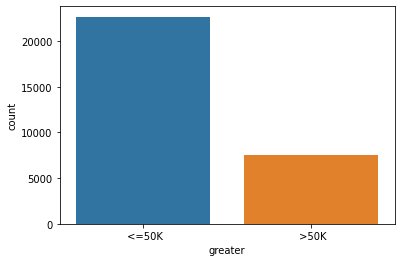

In [ ]:
# dfformatted = df.greater.map({' <=50K': 0, ' >50K': 1})
sns.countplot(x="greater", data=df)
plt.show()


greater  hours-per-week
 <=50K   40                11141
         50                 1481
         45                 1083
         35                 1002
         20                  986
                           ...  
 >50K    73                    1
         89                    1
         95                    1
         96                    1
         97                    1
Name: hours-per-week, Length: 173, dtype: int64


<AxesSubplot:xlabel='greater,hours-per-week'>

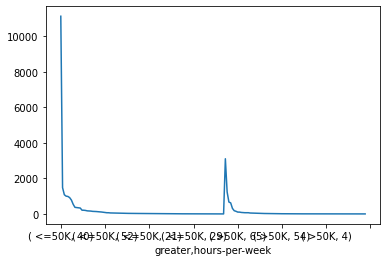

In [ ]:
column = 'hours-per-week'
dfNativeCountry = df[[column, 'greater']]
dfTableMC = dfNativeCountry.groupby('greater')[column].value_counts()
print(dfTableMC)
dfTableMC.plot()


greater  ocupation         
 <=50K    Adm-clerical         3223
          Craft-repair         3122
          Other-service        3080
          Sales                2614
          Prof-specialty       2227
          Exec-managerial      2055
          Machine-op-inspct    1721
          Handlers-cleaners    1267
          Transport-moving     1253
          Farming-fishing       874
          Tech-support          634
          Protective-serv       434
          Priv-house-serv       142
          Armed-Forces            8
 >50K     Exec-managerial      1937
          Prof-specialty       1811
          Sales                 970
          Craft-repair          908
          Adm-clerical          498
          Transport-moving      319
          Tech-support          278
          Machine-op-inspct     245
          Protective-serv       210
          Other-service         132
          Farming-fishing       115
          Handlers-cleaners      83
          Armed-Forces            1


<AxesSubplot:ylabel='greater,ocupation'>

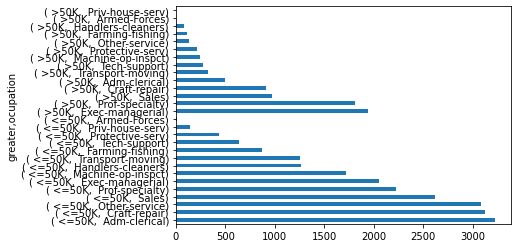

In [ ]:
column = 'ocupation'
dfNativeCountry = df[[column, 'greater']]
dfTableMC = dfNativeCountry.groupby('greater')[column].value_counts()
print(dfTableMC)
dfTableMC.plot(kind='barh')


In [ ]:
dfFormatted = df['greater'] == '>50K'
%matplotlib inline
sns.pairplot(dfFormatted, x_vars=['age', 'education-num'], y_vars='sex', aspect=0.7, kind='reg')


TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [ ]:
df['sex'] = df['sex'] == 'Male'
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,ocupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,greater
234,28,Private,76714,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,False,0,0,55,United-States,>50K
26879,41,Private,178431,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,False,0,0,40,Taiwan,<=50K
19182,53,Private,290640,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,False,0,0,50,Germany,>50K
13485,31,Private,215297,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,False,0,0,45,United-States,<=50K
9625,34,Local-gov,188682,Bachelors,13,Married-spouse-absent,Prof-specialty,Not-in-family,White,False,0,0,40,United-States,<=50K


In [ ]:
treino = df[:9049].values
teste = df[100:].values

print(treino.shape)
print(teste.shape)
# 30162 * 0.3

(9049, 15)
(30062, 15)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# Transforma em valor numérico, as colunas que contém texto
df_c = pd.get_dummies(
    df, columns=['race', 'workclass', 'education'])
df_c.head()
# Normalização
# scaler = StandardScaler()
# scaler.fit(df_c)
# df_c = scaler.transform(df_c)


,age,fnlwgt,education-num,marital-status,ocupation,relationship,sex,capital-gain,capital-loss,hours-per-week,...,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
234,28,76714,15,Never-married,Prof-specialty,Not-in-family,False,0,0,55,...,0,0,0,0,0,0,0,0,1,0
26879,41,178431,9,Married-civ-spouse,Craft-repair,Husband,False,0,0,40,...,0,0,0,0,0,1,0,0,0,0
19182,53,290640,9,Married-civ-spouse,Other-service,Husband,False,0,0,50,...,0,0,0,0,0,1,0,0,0,0
13485,31,215297,9,Married-civ-spouse,Craft-repair,Husband,False,0,0,45,...,0,0,0,0,0,1,0,0,0,0
9625,34,188682,13,Married-spouse-absent,Prof-specialty,Not-in-family,False,0,0,40,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['greater', 'race', 'workclass', 'education', 'native-country', 'marital-status', 'ocupation', 'relationship'])
y = df.greater

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
X.shape

(30162, 7)

In [ ]:
# ELIMINACAO SEQUENCIAL

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# cria um vetor que vai auxiliar a identificar quais registros são considerados
# no treino e quais não são, como se fosse um filtro
indices = []
for _ in range(len(X_train)):
  indices.append(True)

# faz a logica de tentar eliminar cada registro e ver se está correto
for i in range(len(X_train)):
  indices[i] = False
  model = KNeighborsClassifier(n_neighbors=1)
  model.fit(X_train[indices], y_train[indices])

  pred = model.predict([X_train.values[i]])
  if pred != y_train.values[i]:
    indices[i] = True

print("Quantas amostras de treino sobraram:", len(X_train[indices]))

# calcula o resultado final depois da redução

model = KNeighborsClassifier(n_neighbors=100)
model.fit(X_train[indices], y_train[indices])
pred = model.predict(X_test)

print("Acurácia:", (pred == y_test).sum() / len(X_test) * 100)


Quantas amostras de treino sobraram: 7612
Acurácia: 75.33654812135825


# Dados para treino e teste

• Embaralhar dados para melhorar a acertividade dos treinos e testes para não correr o risco dos dados estarem ordenados de alguma maneira.

• Selecionar as colunas com maior relevância para o problema.

• Remover as linhas com dados nulos ou preencher de alguma maneira para não prejudicar a predição. "Já foi feito anteriormente utilizando o comando: df = df.dropna()"

In [7]:
# Embaralhamento das linhas da base
df = df.sample(len(df))

In [11]:
# Colunas de maior relevância que serão utilizadas para a classificação
columns = ['workclass','education','education-num','marital-status','relationship', 'race', 'sex', 'hours-per-week', 'native-country']

# Criação de um DataFrame sem a coluna de predição
df_c = df[columns]

# Definindo 'y' com a coluna de predição
y = df['greater']

### Dummies
• Como não existem apenas dados numéricos, mas também dados categóricos, para construir os modelos de predição pelo 'Sickit Learn' é necessário transformar as colunas que possuem valores em texto em valores númericos. Isso é feito pelo get_dummies

### StandartScaler
• Para evitar o cenário de haver colunas com valores grandes, por exemplo, 30.000 e colunas com valores pequenos 1.000 e isso impactar os resultados, é interessante colocar esses valores dentro de um intervalo de 0 e 1. Isso é feito utilizando o StandartScaler

In [12]:
from sklearn.preprocessing import StandardScaler

# Transforma em valor numérico, as colunas que contém texto
df_c = pd.get_dummies(df_c, columns=['workclass','education','marital-status','relationship','race', 'sex', 'native-country'])

# Normalização
scaler = StandardScaler()
scaler.fit(df_c)
df_c = scaler.transform(df_c)

### Hold-out

Hold-out é um método de separação de valores para treino e teste

Foi escolhido a proporção de 70% treino e 30% teste (proporção padrão)

In [13]:
# Capturando a quantidade que será utilizado para treino e para teste

# Valor total
print(len(df))

# 70% da base
train_percentage = int(len(df)*70/100)
print(train_percentage)

25564
17894


In [14]:
# Criação da massa de treino e teste, utilizando o Holdout
X_train, X_test = df_c[:train_percentage], df_c[train_percentage:]
y_train, y_test = y[:train_percentage], y[train_percentage:]